In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning Dataframe</h1>

In [2]:
df = pd.read_csv('CSV_Files/Raw_House_details.csv')
df.to_csv('CSV_Files/Raw_House_details.csv', index=False)

Get the lay of the land of the Dataframe

In [3]:
df.nunique()

Type of property                25
Location                      1561
postal code                    929
immo code                     8570
Price                         1357
Address                       1762
Bedrooms                        24
Energy class                    13
Primary energy consumption    1001
Furnished                        2
Terrace                          2
Terrace surface                128
Surface of the plot           1649
Living room surface            105
Number of frontages              9
Construction year              164
Building condition               7
Outdoor parking space            1
Bathrooms                       14
Shower rooms                    16
Office                           2
Toilets                         16
Kitchen type                     9
Heating type                     8
province                        11
dtype: int64

In [4]:
df.shape

(8570, 25)

In [5]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,0,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,1988,Good,0,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,As new,0,1,0,0,0,Installed,0,Antwerp


Remove any missing values, strings and characters in the Price column that do not show sheer numeric value

In [6]:

df =df.replace({'€':'','\€':'','\)':'','\.':''},regex=True) 

In [7]:

df = df[df['Price'].notnull() & (df['Price'] != '')]

In [8]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

Replace any 'yes' or 'no' with binary numbers

In [9]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

Remove the Outdoor parking space as the only result was 0

In [10]:
df =df.drop('Outdoor parking space', axis=1) 

In [16]:
round(df['Price'].describe())

count        8570.0
mean       464969.0
std       1011255.0
min            16.0
25%        239000.0
50%        335000.0
75%        479000.0
max      43900000.0
Name: Price, dtype: float64

In [42]:
df.shape

(8080, 24)

In [26]:
df = df.drop(df['Price'].nlargest(10).index)

In [39]:
df = df.drop(df['Price'].nsmallest(100).index)

In [40]:
df['Price'].min()

110000.0

In [43]:
df.shape

(8080, 24)

In [41]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [18]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [19]:
df.sort_values(by='Price',ascending=False).head()  # not df.head() as it will only give the first view of teh dataframe and that is then sorted

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
813,exceptional-property,villers-le-bouillet,4530,10665269,43900000.0,Avenue du Condroz 1/0,4,B,170.0,0,...,3,0,Just renovated,2,0,0,0,0,Fuel oil,Liège
4778,apartment,lummen,3560,10653974,36290830.0,Dorpsstraat 40,2,NS,0.0,0,...,0,0,0,1,0,0,0,0,0,Limburg
3488,new-real-estate-project-houses,otegem,8553,10657205,34487193.0,Burg Gillonlaan 115,0,NS,0.0,0,...,0,0,0,0,0,0,0,0,0,West Flanders
2874,house,wanze,4520,10658991,33900000.0,Avenue du Condroz 1/0,4,F,178.0,0,...,4,0,0,2,0,0,0,0,Gas,Liège
8151,country-cottage,braives fumal,4260,10644184,31900000.0,Avenue du Condroz 1/0,3,F,294.0,0,...,4,0,0,1,0,0,0,0,Fuel oil,Liège


Inspect how many missing values are there in the dataframe

In [20]:
df.isnull().sum()

Type of property                0
Location                        0
postal code                     0
immo code                       0
Price                           0
Address                         0
Bedrooms                        0
Energy class                    0
Primary energy consumption      0
Furnished                       0
Terrace                         0
Terrace surface                 0
Surface of the plot             0
Living room surface             0
Number of frontages             0
Construction year               0
Building condition              0
Bathrooms                       0
Shower rooms                    0
Office                          0
Toilets                         0
Kitchen type                    0
Heating type                    0
province                      160
dtype: int64

In [21]:
#df = df[df.iloc[:, -1].astype(str).str.strip() != '']

df.dropna(subset=['province'], inplace=True)  # dropping missing values in column province

In [22]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       0
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [23]:
#df.to_csv('CSV_Files/House_details.csv', index=False)

<h1>Visualisation</h1>

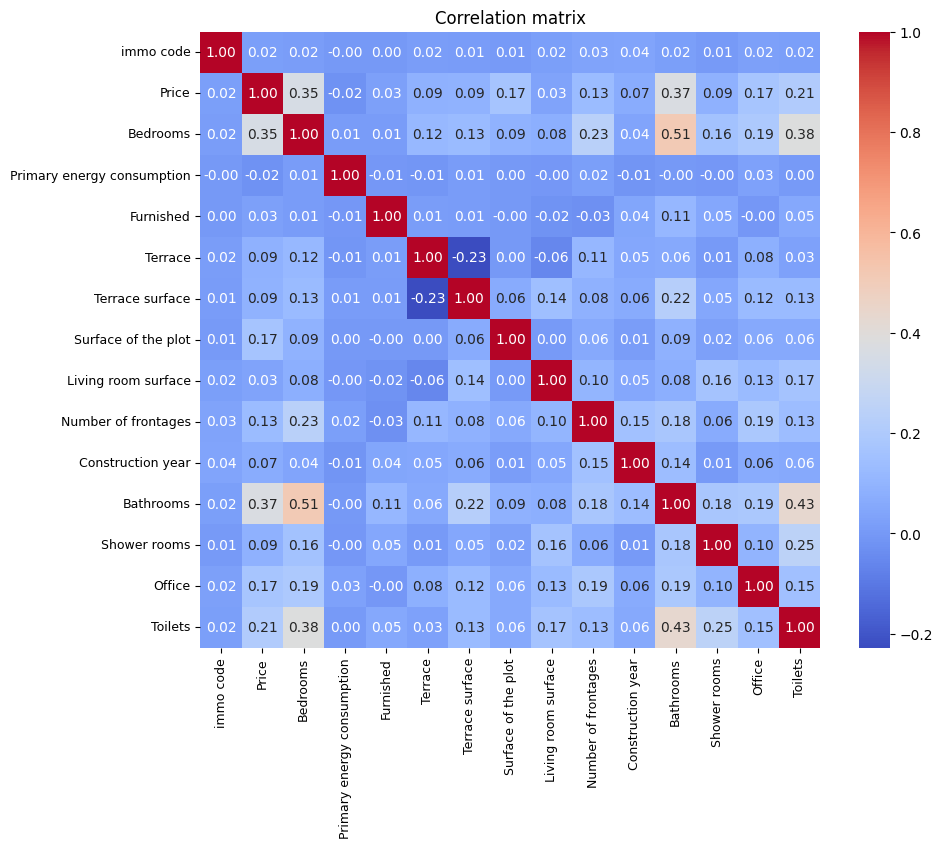

In [44]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

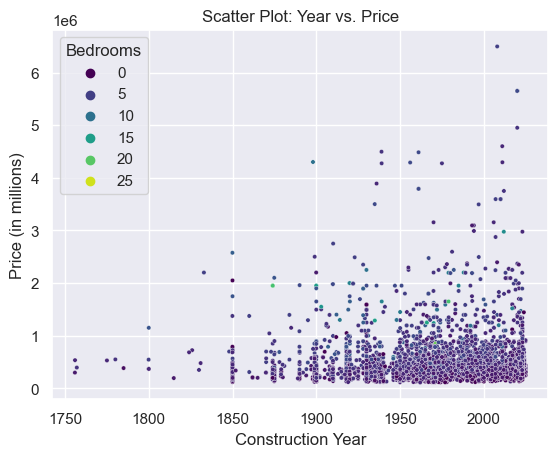

In [46]:



filtered_df = df[df['Construction year'] != 0]


years = filtered_df['Construction year']
prices = filtered_df['Price']
categories = filtered_df['Bedrooms']


jitter = np.random.uniform(low=-0.1, high=0.1, size=len(years))
jittered_years = years + jitter


sns.set(style='darkgrid')


sns.scatterplot(x=jittered_years, y=prices, hue=categories, palette='viridis', s=10)


plt.xlabel('Construction Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Year vs. Price')

plt.colorbar(label='Bedrooms')

# Display the plot
plt.show()

